### Técnicas de processamento de Dados - Discretização

##### importando a biblioteca pandas

In [36]:
import pandas as pd

##### cojunto de dados de exemplo

In [39]:
altura = [1.50,1.57,1.62,1.70,1.85,1.90]

##### aplicando a discretização em 4 bins de tamanho igual e com os labels P, M, G e XG

In [42]:
altura = pd.qcut(altura,4,labels=['P','M','G','XG'])

In [44]:
print(altura)

['P', 'P', 'M', 'G', 'XG', 'XG']
Categories (4, object): ['P' < 'M' < 'G' < 'XG']


##### verificando a quantidade de objetos em cada bin

In [47]:
altura.value_counts()

P     2
M     1
G     1
XG    2
Name: count, dtype: int64

##### lendo a base de dados

In [50]:
dataset = pd.read_csv('../Downloads/kc_house_data.csv')

##### contando o número de pisos

In [53]:
dataset['floors'].value_counts()

floors
1.0    10679
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

##### discretizando os valores do atributo floors e armazenando o resultado no atributo floors_labels

In [56]:
dataset['floors_labels'] = pd.cut(
    dataset['floors'],
    5,
    labels=['Muito-Pequeno','Pequeno','Medio','Grande','Muito-Grande']
)

##### verificando o novo atributo

In [67]:
dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,floors_labels
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Muito-Pequeno
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Pequeno
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Muito-Pequeno
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Muito-Pequeno
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Muito-Pequeno
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,Muito-Pequeno
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,Pequeno
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,Muito-Pequeno
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,Muito-Pequeno
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,Pequeno


##### contagem de valores em cada bin ou categoria

In [69]:
dataset['floors_labels'].value_counts()

floors_labels
Muito-Pequeno    12589
Pequeno           8241
Grande             613
Medio              161
Muito-Grande         8
Name: count, dtype: int64

##### verificando os valores únicos do atributo

In [71]:
dataset['floors_labels'].unique()

['Muito-Pequeno', 'Pequeno', NaN, 'Grande', 'Medio', 'Muito-Grande']
Categories (5, object): ['Muito-Pequeno' < 'Pequeno' < 'Medio' < 'Grande' < 'Muito-Grande']

### Técnicas de processamento de Dados - Normalização de dados

##### norma L2 é definida como a raiz quadrada do somatório de todos os elementos do vetor ao quadrado.

##### importando as bibliotecas necessárias.

In [4]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### alguns dados de exemplo

In [7]:
data = [
    [-1, 2],
    [0.5, 6],
    [0, 10],
    [1, 18]
]
print (data)

[[-1, 2], [0.5, 6], [0, 10], [1, 18]]


#### valor da média

In [10]:
print (np.mean(data))

4.5625


#### visualizando a distribuição dos dados

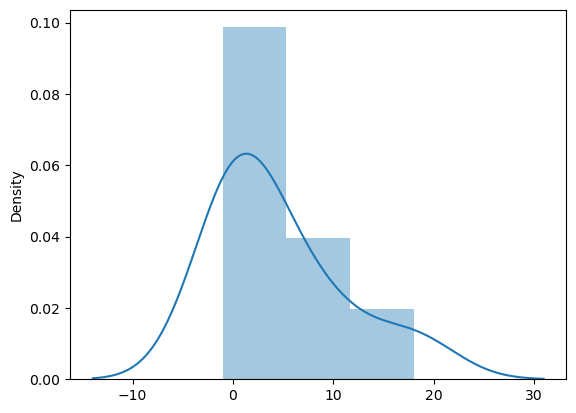

In [13]:
sns.distplot(np.array(data).reshape(-1))
plt.show()

##### instanciando o objeto Normalize

In [54]:
normalizer = Normalizer().fit(data)

##### aplicando a normalização nos dados de exemplo utilizando a norma l2

In [57]:
data2 = normalizer.transform(data)
print(data2)

[[-0.4472136   0.89442719]
 [ 0.08304548  0.99654576]
 [ 0.          1.        ]
 [ 0.05547002  0.99846035]]


#### Alterando a forma dos dados para apenas uma dimensão

In [60]:
data2 = data2.reshape(-1)

#### valor da média

In [63]:
print(np.mean(data2))

0.4475919008033141


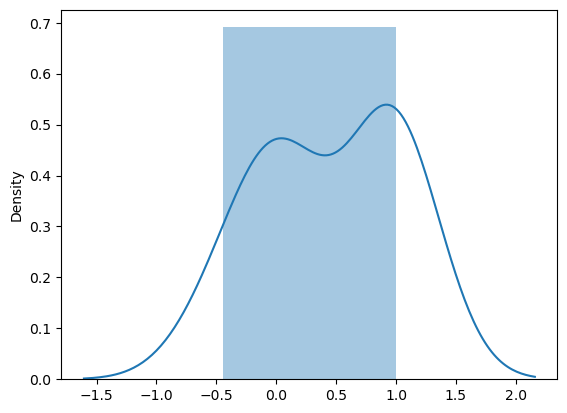

In [65]:
sns.distplot(data2)
plt.show()

### Técnicas de pre-processamento de Dados - Standartization

In [68]:
data = np.random.normal(size = 50)
print(data)

[ 1.32147121 -0.66695929 -1.92092893 -0.97229715  1.70382731 -0.55158758
 -0.38379863 -2.19414997  0.77033872  1.38309441  0.44901736  0.34249895
 -1.12761002  1.38372376 -0.10738232  0.5517167  -2.05162732 -1.123423
 -0.25432143 -1.28136464 -1.12619677 -0.63594114  0.43541886  0.0784878
  0.21072096 -0.61351213  1.17053723 -0.15588367 -0.40178949  0.78090234
  0.87372672  0.24506272  0.19184536 -1.29411864 -1.36118672 -0.14222934
 -0.40869724  0.44214453  0.1044521  -0.12157992 -0.70725084 -0.73224574
  0.23825625 -1.55459512  0.33353867  0.58029345 -0.19899911  1.30720281
 -1.84206728 -0.63352241]


#### Alterando a forma dos dados para apenas uma dimensão

In [71]:
data = data.reshape(-1,1)

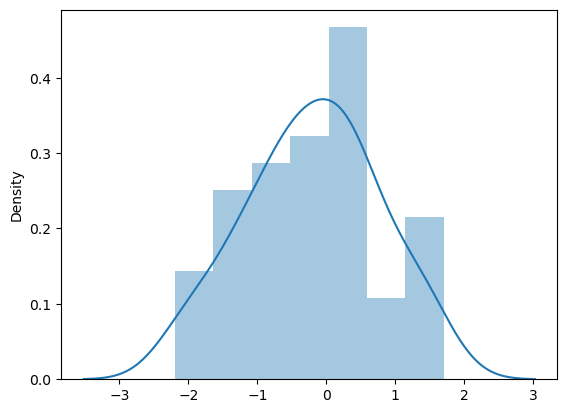

In [73]:
sns.distplot(data)
plt.show()

##### importando as bibliotecas necessárias.

In [15]:
from sklearn.preprocessing import MinMaxScaler

##### instânciando o objeto scaler

In [18]:
scaler = MinMaxScaler().fit(data)

##### transformando os dados com o objeto scaler

In [21]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[0.   0.  ]
 [0.75 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


#### Alterando a forma dos dados para apenas uma dimensão

In [24]:
data_scaled = data_scaled.reshape(-1,1)

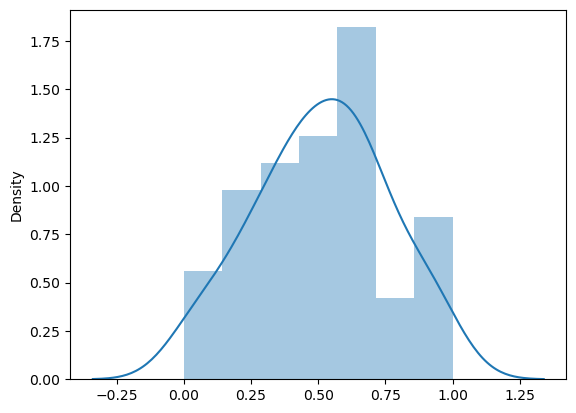

In [87]:
sns.distplot(data_scaled)
plt.show()

# StandardScaler - Técnica de Pré-Processamento

* Padroniza a escala dos dados sem interferir na sua forma

* Mantém a escala dos dados mais fiel que a Técnica MinMaxScale

In [91]:
data = np.random.normal(size = 50)
print(data)

[ 0.55310077  0.50301281 -0.46551457  0.57033828 -0.70260004 -0.94667015
 -0.3741082   0.85147512  0.41144099  0.32552408  0.70242397  0.17328761
 -0.65521823  0.3653825  -0.13873508  1.16789393 -0.94768304 -0.00899925
 -0.74498828  0.21418406 -1.77692205  1.20270463 -0.84283269 -0.16980905
 -2.18876818  0.15035724  1.47977029 -1.42277926 -0.27677519  1.51209616
 -1.31621237 -0.2243974   2.06375672  0.56768896  0.6551064   0.11054324
  0.14155258 -0.65717313  0.33735738 -0.88309836 -0.47622051 -0.9319668
  0.39081883 -0.77470566 -0.83157437  0.30692404 -1.17846596 -0.70607149
  1.05848349 -0.45724404]


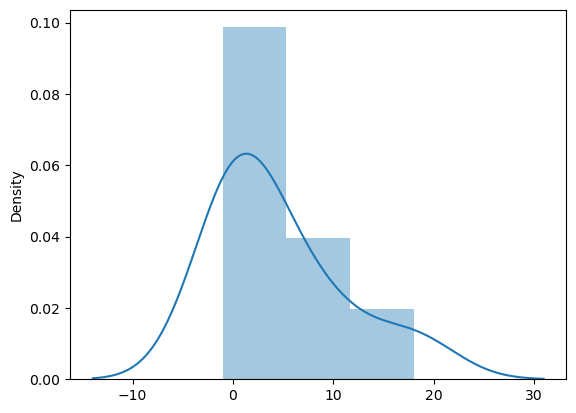

In [26]:
sns.distplot(data)
plt.show()

#### Alterando a forma dos dados para apenas uma dimensão

In [94]:
data = data.reshape(-1,1)

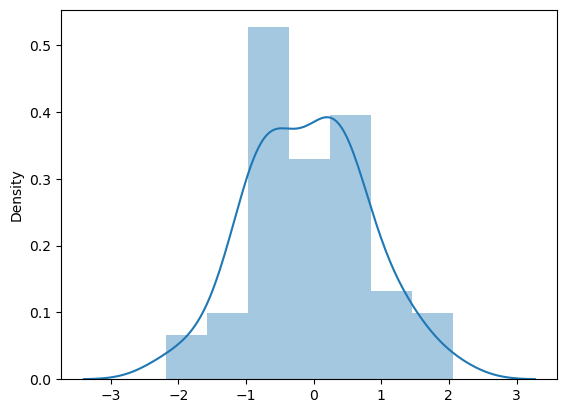

In [96]:
sns.distplot(data)
plt.show()

##### importando as bibliotecas necessárias.

In [99]:
from sklearn.preprocessing import StandardScaler

##### instânciando o objeto scaler

In [102]:
scaler = StandardScaler().fit(data)

##### transformando os dados com o objeto scaler

In [105]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[ 0.73304965]
 [ 0.67557046]
 [-0.43587782]
 [ 0.75283081]
 [-0.70794884]
 [-0.98803519]
 [-0.33098306]
 [ 1.07545366]
 [ 0.57048582]
 [ 0.47189057]
 [ 0.90440775]
 [ 0.2971893 ]
 [-0.65357513]
 [ 0.5176307 ]
 [-0.06087706]
 [ 1.43856485]
 [-0.98919756]
 [ 0.08800326]
 [-0.75659211]
 [ 0.34412065]
 [-1.94080335]
 [ 1.4785124 ]
 [-0.86887494]
 [-0.09653647]
 [-2.41342361]
 [ 0.27087521]
 [ 1.7964633 ]
 [-1.53440143]
 [-0.21928708]
 [ 1.83355935]
 [-1.41210897]
 [-0.15918016]
 [ 2.46662578]
 [ 0.74979054]
 [ 0.85010775]
 [ 0.22518605]
 [ 0.26077129]
 [-0.6558185 ]
 [ 0.48547005]
 [-0.91508243]
 [-0.44816358]
 [-0.97116214]
 [ 0.54682055]
 [-0.79069474]
 [-0.85595529]
 [ 0.45054581]
 [-1.25403599]
 [-0.71193256]
 [ 1.31300925]
 [-0.42638684]]


#### Alterando a forma dos dados para apenas uma dimensão

In [108]:
data_scaled = data_scaled.reshape(-1,1)

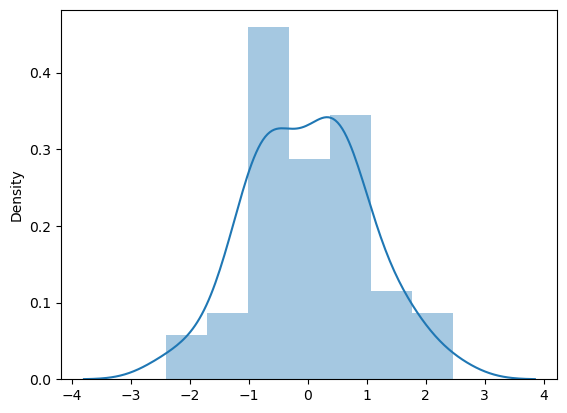

In [110]:
sns.distplot(data_scaled)
plt.show()